In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Load the dataset
file_path = "Employee.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
# Unique values in each feature
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in Company: 6
Unique values in Age: 29
Unique values in Salary: 40
Unique values in Place: 11
Unique values in Country: 1
Unique values in Gender: 2


In [7]:
# Replacing age 0 with NaN
df.loc[df['Age'] == 0, 'Age'] = np.nan

# Removing duplicate rows
df.drop_duplicates(inplace=True)

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df['Company'].fillna(df['Company'].mode()[0], inplace=True)
df['Place'].fillna(df['Place'].mode()[0], inplace=True)

C:\Users\gaius\AppData\Local\Temp\ipykernel_13528\731429212.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\gaius\AppData\Local\Temp\ipykernel_13528\731429212.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
# Filtering data (Age > 40 and Salary < 5000)
df_filtered = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
df_filtered.head()

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0


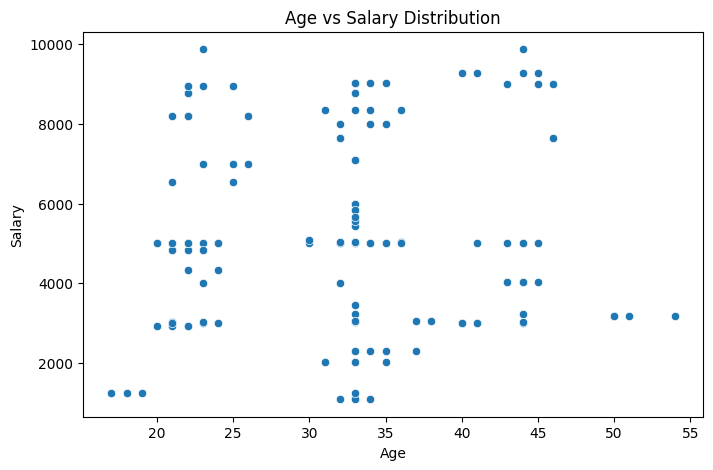

In [9]:
# Plot Age vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary Distribution')
plt.show()

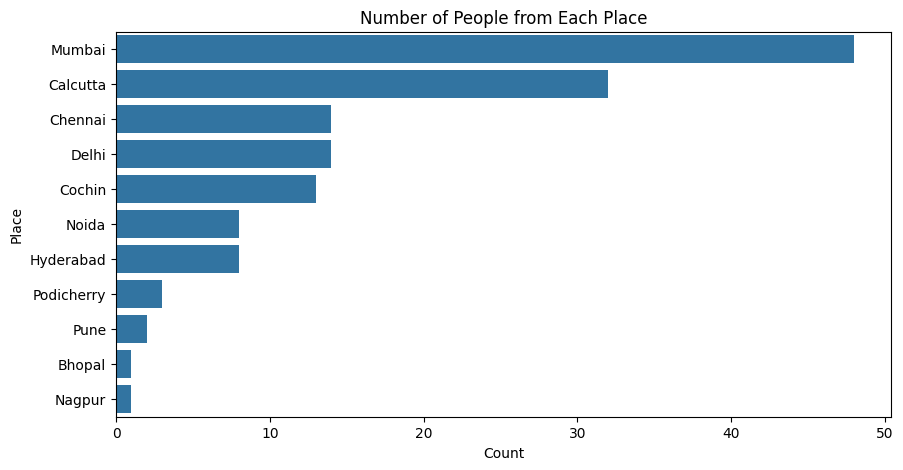

In [10]:
# Countplot of people from each place
plt.figure(figsize=(10,5))
sns.countplot(y=df['Place'], order=df['Place'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Place")
plt.title("Number of People from Each Place")
plt.show()

In [11]:
# Encoding categorical variables
label_enc = LabelEncoder()
df['Company'] = label_enc.fit_transform(df['Company'])
df['Place'] = label_enc.fit_transform(df['Place'])
df['Country'] = label_enc.fit_transform(df['Country'])

In [12]:
# Feature Scaling
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])

minmax_scaler = MinMaxScaler()
df[['Age', 'Salary']] = minmax_scaler.fit_transform(df[['Age', 'Salary']])

In [13]:
# Save cleaned and processed data
df.to_csv("Processed_Employee.csv", index=False)
df.head()

,Company,Age,Salary,Place,Country,Gender
0,4,0.081081,0.445089,2,0,0
1,2,0.351351,0.445089,6,0,0
2,4,0.486486,0.137817,1,0,0
3,2,0.621622,0.217480,4,0,0
4,4,0.162162,0.331285,6,0,0
